<a href="https://colab.research.google.com/github/Kgs-Mathaba/Time_Series_modelling_using_Facebook_Prophet/blob/main/Multivariate_Time_Series_using_FB_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fbprophet

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (15,10)
mpl.rcParams['axes.grid'] = False 

In [3]:
url = 'https://raw.githubusercontent.com/Kgs-Mathaba/Time_Series_modelling_using_Facebook_Prophet/main/nyc_energy_consumption.csv'
df = pd.read_csv(url)

In [8]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [10]:
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [12]:
ny_df = df.set_index('timeStamp')

In [13]:
ny_df_daily = ny_df.resample('D').mean()

In [14]:
fig = px.line(df, x = 'timeStamp', y='demand',hover_data=['temp'], title='NYC Energy Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
          dict(count=1, label='1y', step='year', stepmode='backward'),
          dict(count=2, label='3y', step='year', stepmode='backward'),
          dict(count=3, label='5y', step='year', stepmode='backward'),
          dict(step='all'),
        ])
    )
)
fig.show()

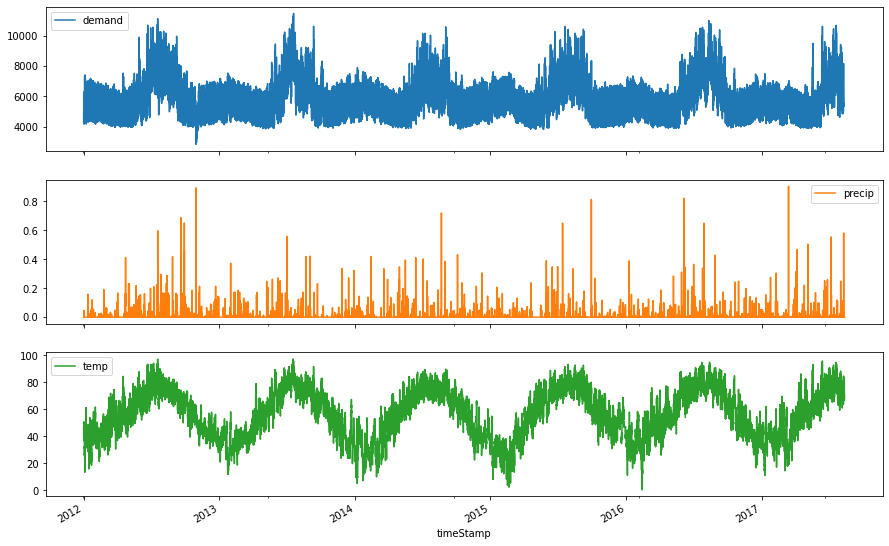

In [15]:
ny_df.plot(subplots=True);

In [16]:
ny_df_daily

,demand,precip,temp
timeStamp,,,
2012-01-01,4954.833333,0.002487,46.510000
2012-01-02,5302.954167,0.000000,40.496667
2012-01-03,6095.512500,0.000000,26.672500
2012-01-04,6336.266667,0.000000,20.585000
2012-01-05,6130.245833,0.000000,33.577500
...,...,...,...
2017-08-08,6471.626042,0.000000,71.039167
2017-08-09,6811.112167,0.047529,73.852500
2017-08-10,5582.297000,0.002033,75.217500


In [17]:
ny_df_final = ny_df_daily.reset_index()[['timeStamp', 'demand', 'temp']].rename({'timeStamp':'ds', 'demand':'y', 'temp':'temp'}, axis='columns')
ny_df_final

,ds,y,temp
0,2012-01-01,4954.833333,46.510000
1,2012-01-02,5302.954167,40.496667
2,2012-01-03,6095.512500,26.672500
3,2012-01-04,6336.266667,20.585000
4,2012-01-05,6130.245833,33.577500
...,...,...,...
2046,2017-08-08,6471.626042,71.039167
2047,2017-08-09,6811.112167,73.852500
2048,2017-08-10,5582.297000,75.217500
2049,2017-08-11,NaN,72.767917


In [18]:
ny_df_final.query('temp != temp') # missing value cannot be compared to itself since its an object

,ds,y,temp
1457,2015-12-28,5510.776333,NaN


In [20]:
# Fill with previous value
ny_df_final['temp'] = ny_df_final['temp'].fillna(method='ffill') # use forward fill

In [21]:
ny_df_final['month'] = ny_df_final['ds'].dt.month

In [22]:
ny_df_final.head()

,ds,y,temp,month
0,2012-01-01,4954.833333,46.510000,1
1,2012-01-02,5302.954167,40.496667,1
2,2012-01-03,6095.512500,26.672500,1
3,2012-01-04,6336.266667,20.585000,1
4,2012-01-05,6130.245833,33.577500,1


In [23]:
fig = px.line(ny_df_final, x='ds', y='y', hover_data=['temp', 'month'], title='NYC Energy Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
          dict(count=1, label='1y', step='year', stepmode='backward'),
          dict(count=2, label='3y', step='year', stepmode='backward'),
          dict(count=3, label='5y', step='year', stepmode='backward'),
          dict(step='all'),
        ])
    )
)
fig.show()

In [24]:
ny_df_final[['month', 'temp']].groupby('month').agg({'temp':{'max', 'min', 'mean'}})

temp                      
             min        max       mean
month                                 
1       9.507917  55.420455  33.432140
2       9.015000  59.360000  34.517758
3      20.291667  67.878333  41.419884
4      33.045833  72.992083  52.600204
5      48.090833  82.576250  62.543994
6      52.405833  86.916667  71.334418
7      66.417083  89.606667  77.595627
8      68.042083  87.426250  75.525947
9      57.274583  84.448750  69.550306
10     42.106250  74.277500  58.642895
11     27.172500  67.606250  47.225638
12     22.429583  64.735000  41.520068

In [25]:
ny_df_final[['y', 'temp']].corr()

,y,temp
y,1.000000,0.560888
temp,0.560888,1.000000


In [26]:
ny_df_final.query('temp > 80')[['y', 'temp']].corr()

,y,temp
y,1.000000,0.552918
temp,0.552918,1.000000


In [27]:
ny_df_final.query('temp < 80')[['y', 'temp']].corr()

,y,temp
y,1.000000,0.470562
temp,0.470562,1.000000


In [28]:
def summer_temp(temp):
  if temp > 80:
    return 1
  else:
    return 0 

In [29]:
ny_df_final['summer_temp'] = ny_df_final['temp'].apply(summer_temp)

In [31]:
ny_df_final['month_bins'] = pd.cut(ny_df_final['month'], bins=3, labels=False)

,ds,y,temp,month,summer_temp,month_bins
0,2012-01-01,4954.833333,46.510000,1,0,0
1,2012-01-02,5302.954167,40.496667,1,0,0
2,2012-01-03,6095.512500,26.672500,1,0,0
3,2012-01-04,6336.266667,20.585000,1,0,0
4,2012-01-05,6130.245833,33.577500,1,0,0
...,...,...,...,...,...,...
2046,2017-08-08,6471.626042,71.039167,8,0,1
2047,2017-08-09,6811.112167,73.852500,8,0,1
2048,2017-08-10,5582.297000,75.217500,8,0,1
2049,2017-08-11,NaN,72.767917,8,0,1


In [35]:
ny_df_final[250:270]

,ds,y,temp,month,summer_temp,month_bins
250,2012-09-07,8191.941667,74.303333,9,0,2
251,2012-09-08,7375.425000,73.999167,9,0,2
252,2012-09-09,6157.412500,67.809583,9,0,2
253,2012-09-10,6388.537500,64.560833,9,0,2
254,2012-09-11,6079.908333,62.608333,9,0,2
255,2012-09-12,6420.725000,66.222083,9,0,2
256,2012-09-13,6679.675000,68.477083,9,0,2
257,2012-09-14,6784.204167,68.352083,9,0,2
258,2012-09-15,5694.500000,67.660000,9,0,2
259,2012-09-16,5371.204167,64.878333,9,0,2


In [36]:
train = ny_df_final[(ny_df_final['ds'] >= '2012-01-01') & (ny_df_final['ds'] <= '2017-04-30')]
test = ny_df_final[(ny_df_final['ds'] > '2017-04-30')]

In [37]:
train.shape, test.shape

((1947, 6), (104, 6))

In [38]:
test

,ds,y,temp,month,summer_temp,month_bins
1947,2017-05-01,5417.231583,60.300833,5,0,1
1948,2017-05-02,5697.950042,67.537917,5,0,1
1949,2017-05-03,5354.628500,59.413333,5,0,1
1950,2017-05-04,5235.704833,54.877083,5,0,1
1951,2017-05-05,5358.639500,55.720833,5,0,1
...,...,...,...,...,...,...
2046,2017-08-08,6471.626042,71.039167,8,0,1
2047,2017-08-09,6811.112167,73.852500,8,0,1
2048,2017-08-10,5582.297000,75.217500,8,0,1
2049,2017-08-11,NaN,72.767917,8,0,1


In [40]:
from fbprophet import Prophet
m = Prophet(interval_width=0.95, yearly_seasonality=True)

In [41]:
m.add_regressor('summer_temp', standardize=False)
m.add_regressor('month_bins', standardize=False, mode = 'multiplicative')

In [42]:
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [43]:
m.params

{'beta': array([[-0.03533224, -0.05908614,  0.04954115,  0.04016154, -0.00949253,
         -0.00175952, -0.00774787, -0.0025231 ,  0.00346012, -0.00584737,
          0.00141742,  0.00306494, -0.0052296 , -0.00380071,  0.00339492,
         -0.00275942,  0.00072281,  0.0014427 , -0.00129248, -0.00031338,
         -0.02719667,  0.02414946,  0.02027371,  0.0015273 , -0.00497139,
         -0.00518766,  0.13391034, -0.00900211]]),
 'delta': array([[ 2.62586773e-07, -3.26727576e-07, -2.16617015e-01,
          1.43218679e-07,  2.00371180e-06,  2.04580057e-02,
          1.16069001e-02,  4.76859855e-03,  1.16857422e-05,
          2.96751882e-06, -6.11302300e-08, -5.03737589e-02,
          1.37955242e-07,  2.50431414e-08,  1.59765863e-01,
          1.20138102e-06, -1.59985186e-07, -1.18332013e-01,
         -3.71780717e-02, -3.50381728e-07, -1.54156852e-07,
          2.09226176e-07,  4.24745127e-02,  2.58967736e-02,
         -6.28762839e-08]]),
 'k': array([[0.17108631]]),
 'm': array([[0.58727563

In [44]:
future = m.make_future_dataframe(periods=104)
future.tail()

,ds
2046,2017-08-08
2047,2017-08-09
2048,2017-08-10
2049,2017-08-11
2050,2017-08-12


In [47]:
future['summer_temp'] = ny_df_final['summer_temp']

In [48]:
future['month_bins'] = ny_df_final['month_bins']

In [49]:
future

,ds,summer_temp,month_bins
0,2012-01-01,0,0
1,2012-01-02,0,0
2,2012-01-03,0,0
3,2012-01-04,0,0
4,2012-01-05,0,0
...,...,...,...
2046,2017-08-08,0,1
2047,2017-08-09,0,1
2048,2017-08-10,0,1
2049,2017-08-11,0,1


In [50]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2046,2017-08-08,7383.265317,6655.407589,8128.059741
2047,2017-08-09,7394.079126,6662.547036,8240.358253
2048,2017-08-10,7364.391019,6591.585127,8141.255480
2049,2017-08-11,7314.202091,6523.031690,8084.032392
2050,2017-08-12,6733.330656,5958.883180,7457.232464


In [51]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'extra_regressors_additive', 'extra_regressors_additive_lower',
       'extra_regressors_additive_upper', 'extra_regressors_multiplicative',
       'extra_regressors_multiplicative_lower',
       'extra_regressors_multiplicative_upper', 'month_bins',
       'month_bins_lower', 'month_bins_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper',
       'summer_temp', 'summer_temp_lower', 'summer_temp_upper', 'weekly',
       'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'yhat'],
      dtype='object')

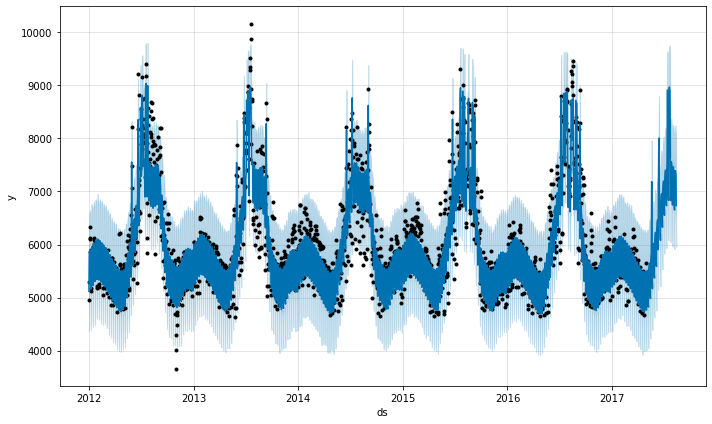

In [52]:
fig1 = m.plot(forecast)

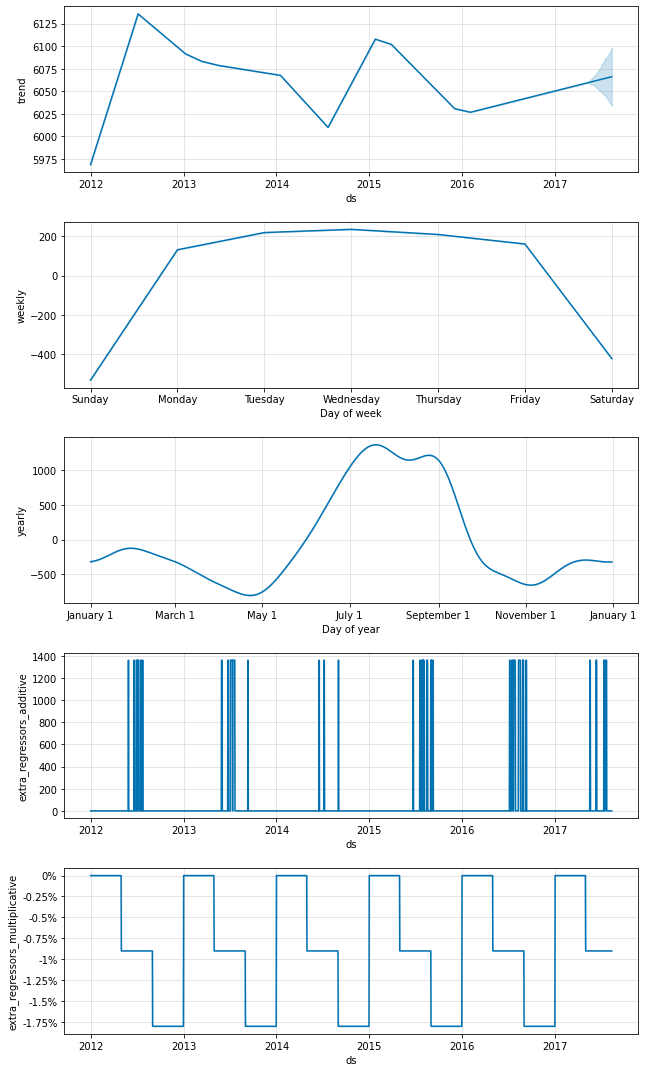

In [53]:
fig2 = m.plot_components(forecast)

In [54]:
from fbprophet.diagnostics import cross_validation, performance_metrics
cv_results = cross_validation(model=m, initial='731 days', horizon='365 days')
df_p = performance_metrics(cv_results)
df_p

INFO:fbprophet:Making 5 forecasts with cutoffs between 2014-05-01 00:00:00 and 2016-04-30 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days 12:00:00,202285.749279,449.761881,351.118788,0.062256,0.052819,0.890110
1,37 days 00:00:00,208316.919927,456.417484,357.957015,0.063409,0.053519,0.890110
2,37 days 12:00:00,209634.750904,457.858877,360.400469,0.063821,0.054313,0.890110
3,38 days 00:00:00,213749.756327,462.330787,364.592561,0.064257,0.054982,0.884615
4,38 days 12:00:00,216038.669577,464.799602,368.572735,0.064891,0.055522,0.884615
...,...,...,...,...,...,...,...
653,363 days 00:00:00,150705.855446,388.208521,325.292187,0.059521,0.058536,0.978022
654,363 days 12:00:00,151355.393213,389.044205,325.529662,0.059562,0.058536,0.978022
655,364 days 00:00:00,154184.849927,392.663787,327.942953,0.060207,0.058950,0.972527
656,364 days 12:00:00,153824.079024,392.204129,326.976109,0.060049,0.058710,0.972527


/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



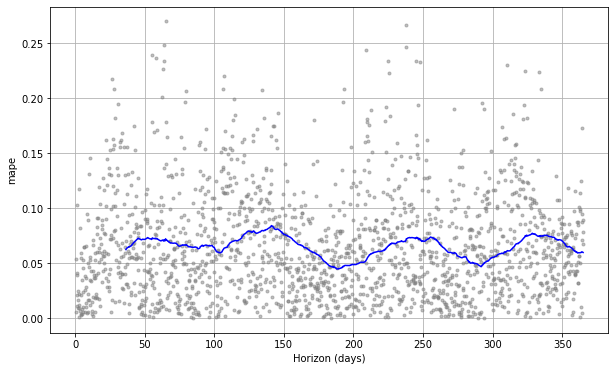

In [57]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(cv_results, metric='mape')